# Pooling-imputation performance from real bead chip data with high density markers

Performs pooling simulation and imputation on data from the chromosome 20 of 1000GP.
Markers have been chosen as the intersection between the real bead chip Illumina Infinium OmniExpress2.5 - 8 Kit
 (https://support.illumina.com/array/array_kits/humanomniexpress2.5-8-beadchip-kit/downloads.html) 
 and the chr20 1000GP data. The samples are randomly assigned to the reference panel or the study population.

Apply pooling simulation on this data, and imputation (run parallel execution): 
**pool and impute bead chip markers only, compute metrics and plot statistics** 

In [1]:
import os

try:
    os.mkdir('/home/camille/PoolImpHuman/data/20200709')
except FileExistsError:
    pass
os.chdir('/home/camille/PoolImpHuman/data/20200709')

In [5]:
print('Configure directory')
%sx ln -s ~/1000Genomes/src/VCFPooling/python/omniexpress8chr20.ipynb ./
%sx ln -s ~/1000Genomes/src/VCFPooling/python/omniexpress_20200709.ipynb ./
%sx ln -s ~/1000Genomes/src/VCFPooling/python/parallel_pooling_20200624.py ./
# %sx ln -s ~/1000Genomes/src/VCFPooling/python/beagle_impute_20200624.py ./
%sx ln -s ../omniexpress8/InfiniumOmniExpress-chr20-CHROM-POS.txt ./

Configure directory


[]

### Prepare experimental VCF file

In [6]:
print('Create file')
%sx bcftools view -Oz -o ALL.chr20.snps.gt.vcf.gz -R InfiniumOmniExpress-chr20-CHROM-POS.txt ../main/ALL.chr20.snps.gt.vcf.gz

Create file


[]

In [7]:
print('Index file')
%sx bcftools index ALL.chr20.snps.gt.vcf.gz

Index file


[]

In [8]:
print('Check number of samples')
%sx bcftools query -l ALL.chr20.snps.gt.vcf.gz | wc -l

Check number of samples


['2504']

In [9]:
print('Check number of intersected markers')
%sx bcftools view -H ALL.chr20.snps.gt.vcf.gz | wc -l

Check number of intersected markers


['52697']

In [10]:
print('Shuffle split into file for STU and PAN populations')
from scripts.VCFPooling.poolSNPs import poolvcf
from scripts.VCFPooling.poolSNPs.pooler import Design

ds = Design()
dm = ds.matrix

sfsp = poolvcf.ShuffleSplitVCF(dm, 'ALL.chr20.snps.gt.vcf.gz', stu_size=0.1, wd=os.getcwd())
sfsp.split_file('chr20.snps.gt.vcf.gz')
# Change files prefixes to not mess up all the settings

Shuffle split into file for STU and PAN populations
['/home/camille/PoolImpHuman/data/20200709', '/home/camille/1000Genomes', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/camille/1000Genomes/venv3.6/lib/python3.6/site-packages', '/home/camille/1000Genomes/venv3.6/lib/python3.6/site-packages/setuptools-40.8.0-py3.6.egg', '/home/camille/1000Genomes/venv3.6/lib/python3.6/site-packages/pip-19.0.3-py3.6.egg', '/home/camille/1000Genomes/venv3.6/lib/python3.6/site-packages/IPython/extensions', '/home/camille/.ipython', '/usr/bin/pycharm/plugins/python/helpers/pydev', '/usr/bin/pycharm/plugins/python/helpers-pro/jupyter_debug']
/home/camille/PoolImpHuman/data/20200709/REF.chr20.snps.gt.vcf.gz:
 File created? -> True
/home/camille/PoolImpHuman/data/20200709/REF.chr20.snps.gt.vcf.gz:
 File indexed? -> True
/home/camille/PoolImpHuman/data/20200709/IMP.chr20.snps.gt.vcf.gz:
 File created? -> True
/home/camille/PoolImpHuman/data/20200709/IMP.chr20.snps

In [19]:
print('Clean data/tmp directory')
%sx rm ~/PoolImpHuman/data/tmp/*

Clean data/tmp directory


[]

In [20]:
print('Chunk the file to be imputed')
%sx ln -s /home/camille/PoolImpHuman/bin/bash-scripts/bcfchunkpara.sh ./
%sx bash bcfchunkpara.sh IMP.chr20.snps.gt.vcf.gz ~/PoolImpHuman/data/tmp 1000
# NB: file_in parameter cannot have path prefix, it must be a file name only

Chunk the file to be imputed


['Counting lines in IMP.chr20.snps.gt.vcf.gz',
 'Number of files to pack =  53',
 'Worker 0 GO!',
 'Worker 1 GO!',
 'Worker 2 GO!',
 'Worker 3 GO!',
 'Worker 1: Packing and writing chunk 1',
 'Starts at POS 863744 and ends at POS 1821917',
 'Worker 2: Packing and writing chunk 2',
 'Starts at POS 1823326 and ends at POS 2827243',
 'Worker 0: Packing and writing chunk 0',
 'Starts at POS 61651 and ends at POS 863706',
 'Worker 3: Packing and writing chunk 3',
 'Starts at POS 2827468 and ends at POS 4074065',
 "    Worker 2: Chunk '2' OK!",
 "    Worker 1: Chunk '1' OK!",
 "    Worker 3: Chunk '3' OK!",
 "    Worker 0: Chunk '0' OK!",
 'Worker 2: Packing and writing chunk 6',
 'Starts at POS 5756281 and ends at POS 6693076',
 'Worker 1: Packing and writing chunk 5',
 'Starts at POS 4790612 and ends at POS 5754542',
 "    Worker 2: Chunk '6' OK!",
 "    Worker 1: Chunk '5' OK!",
 'Worker 3: Packing and writing chunk 7',
 'Starts at POS 6693128 and ends at POS 7694701',
 'Worker 0: Packing

In [21]:
print('Pool the chunks')
%sx source ~/1000Genomes/venv3.6/bin/activate
%sx python3 -u parallel_pooling_20200624.py /home/camille/PoolImpHuman/data/20200709/IMP.chr20.snps.gt.vcf.gz /home/camille/PoolImpHuman/data/20200709/IMP.chr20.pooled.snps.gl.vcf.gz 4

Pool the chunks


["['/home/camille/PoolImpHuman/data/20200709', '/home/camille/1000Genomes', '/home/camille/1000Genomes/scripts/VCFPooling/python', '/home/camille/1000Genomes', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/home/camille/1000Genomes/venv3.6/lib/python3.6/site-packages', '/home/camille/1000Genomes/venv3.6/lib/python3.6/site-packages/setuptools-40.8.0-py3.6.egg', '/home/camille/1000Genomes/venv3.6/lib/python3.6/site-packages/pip-19.0.3-py3.6.egg']",
 'SNIC PROJ: /home/camille/PoolImpHuman/data',
 '',
 '*******************************************************************************',
 'Number of cpu to be used = 4',
 'Input file = /home/camille/PoolImpHuman/data/20200709/IMP.chr20.snps.gt.vcf.gz',
 'Output file = /home/camille/PoolImpHuman/data/20200709/IMP.chr20.pooled.snps.gl.vcf.gz',
 '*******************************************************************************',
 '',
 '',
 '53 files found will be pooled.............................................

```bash
'Time for pooling 1000 variants = 7.178343366999798 sec',
 '',
 'Time elapsed -->  234.9365931279999',
 '/home/camille/PoolImpHuman/data/tmp/IMP.chr20.snps.gt.vcf:',
 ' File created? -> True',
 'Writing to /tmp/bcftools-sort.Wbuk37',
 'Merging 1 temporary files',
 'Cleaning',
 'Done',
 '/home/camille/PoolImpHuman/data/tmp/IMP.chr20.snps.gt.vcf:',
 ' File sorted? -> True',
 '/home/camille/PoolImpHuman/data/tmp/IMP.chr20.pooled.snps.gl.vcf.gz:',
 ' File created? -> True',
 '/home/camille/PoolImpHuman/data/tmp/IMP.chr20.pooled.snps.gl.vcf.gz:',
 ' File indexed? -> True',
 '',
 'Time elapsed -->  252.08425310299936'
```

In [23]:
print('Impute missing genotypes in the pooled file')
%sx ln -s /home/camille/PoolImpHuman/bin/bash-scripts/beagle_pipeline.sh ./
%sx bash beagle_pipeline.sh

Impute missing genotypes in the pooled file


['Contigs in the reference file',
 '.................................................................................',
 'Chromosome  20    Startpos = 61651    Endpos = 62947458',
 '',
 '',
 'Check FORMAT field in files for imputation',
 '.................................................................................',
 'FORMAT in reference panel:  GT',
 'FORMAT in target:  GL',
 '',
 '',
 'Check number of samples and number of markers in files for imputation',
 '.................................................................................',
 'reference:',
 '2264',
 '',
 'target:',
 '240',
 '',
 '',
 'Phase reference and target with BEAGLE',
 '.................................................................................',
 'Beagle .jar file used at: /home/camille/1000Genomes/scripts/beagle.11Mar19.69c.jar',
 '',
 'FORMAT in the phased ref file: GT',
 '',
 'FORMAT in the phased target file: GT',
 '',
 '',
 'Deduplicate possibly duplicated markers',
 '..........................

In [24]:
print('Plotting results with bcftools stats')
%sx deactivate
# bcftools stats needs python 2.7
%sx bcftools stats --af-bins 0.01,0.02,0.04,0.08,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.98 --collapse snps -S study.population IMP.chr20.pooled.imputed.vcf.gz IMP.chr20.snps.gt.vcf.gz > filestats.vchk
%sx plot-vcfstats -p bcftoolstats -s filestats.vchk

Plotting results with bcftools stats


['Parsing bcftools stats output: filestats.vchk',
 'Warning: Possible version mismatch, the definition line differs',
 '\texpected: # PSC\t[2]id\t[3]sample\t[4]nRefHom\t[5]nNonRefHom\t[6]nHets\t[7]nTransitions\t[8]nTransversions\t[9]nIndels\t[10]average depth\t[11]nSingletons',
 '\tfound:    # PSC\t[2]id\t[3]sample\t[4]nRefHom\t[5]nNonRefHom\t[6]nHets\t[7]nTransitions\t[8]nTransversions\t[9]nIndels\t[10]average depth\t[11]nSingletons\t[12]nHapRef\t[13]nHapAlt\t[14]nMissing',
 'Plotting graphs: python plot.py',
 'plot.py:208: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.',
 'Invalid limit will be ignored.',
 '  ax1.set_xlim(0,1.01)',
 'plot.py:230: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.',
 'Invalid limit will be ignored.',
 '  ax1.set_xlim(0,1.01)',
 'Creating PDF: pdflatex summary.tex >plot-vcfstats.log 2>&1',
 'Finished: bcftoolstats/summary.pdf']

### Compute results with customized metrics

In [2]:
paths = {'beaglegt': {
    'true': '/home/camille/PoolImpHuman/data/20200709/IMP.chr20.snps.gt.vcf.gz',
    'imputed': '/home/camille/PoolImpHuman/data/20200709/IMP.chr20.pooled.imputed.vcf.gz'},
         'beaglegl': {
     'true': '/home/camille/PoolImpHuman/data/20200709/IMP.chr20.snps.gl.vcf.gz',
     'imputed': '/home/camille/PoolImpHuman/data/20200709/IMP.chr20.pooled.imputed.vcf.gz'},
}

In [3]:
import subprocess

convertgtgl = True
if convertgtgl:
    cmd = 'bash ~/PoolImpHuman/bin/bash-scripts/gt_to_gl.sh {} {}'.format(paths['beaglegt']['true'], paths['beaglegl']['true'])
    subprocess.run(cmd, shell=True,)

In [4]:
import pandas as pd
from scripts.VCFPooling.poolSNPs.metrics import quality

['/home/camille/PoolImpHuman/data/20200709', '/home/camille/1000Genomes', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/camille/1000Genomes/venv3.6/lib/python3.6/site-packages', '/home/camille/1000Genomes/venv3.6/lib/python3.6/site-packages/setuptools-40.8.0-py3.6.egg', '/home/camille/1000Genomes/venv3.6/lib/python3.6/site-packages/pip-19.0.3-py3.6.egg', '/home/camille/1000Genomes/venv3.6/lib/python3.6/site-packages/IPython/extensions', '/home/camille/.ipython', '/usr/bin/pycharm/plugins/python/helpers/pydev', '/usr/bin/pycharm/plugins/python/helpers-pro/jupyter_debug']


In [5]:
qbeaglegt = quality.QualityGT(*paths['beaglegt'].values(), 0, idx='id')

In [6]:
qbeaglegl = quality.QualityGL(paths['beaglegl']['true'], paths['beaglegl']['imputed'], 0, idx='id')
messbeagle = qbeaglegl.cross_entropy

In [7]:
#qbeaglegl = quality.QualityGT(*paths['beaglegt'].values(), 0, idx='id')
tabbeaglegl = pd.concat([qbeaglegt.concordance(),
                       qbeaglegt.trueobj.af_info,
                       qbeaglegt.pearsoncorrelation(),
                       qbeaglegt.precision,
                       qbeaglegt.accuracy,
                       qbeaglegt.recall,
                       qbeaglegt.f1_score,
                        qbeaglegl.cross_entropy], axis=1)
dosbeaglegl = qbeaglegt.alleledosage()


In [8]:
tabbeaglegl.head()

,concordance,af_info,r_squared,precision_score,accuracy_score,recall_score,f1_score,cross_entropy
variants,,,,,,,,
rs76553454,1.000000,0.005791,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
rs6076506,0.770833,0.130990,0.081230,0.763365,0.779167,0.779167,0.694992,1.104167
rs6139074,0.525000,0.218251,NaN,0.335434,0.579167,0.579167,0.424824,2.104167
rs1418258,0.387500,0.439497,0.006692,0.375195,0.462500,0.462500,0.414202,2.687500
rs6086616,0.429167,0.571286,0.005724,0.439648,0.441667,0.441667,0.317870,2.791667


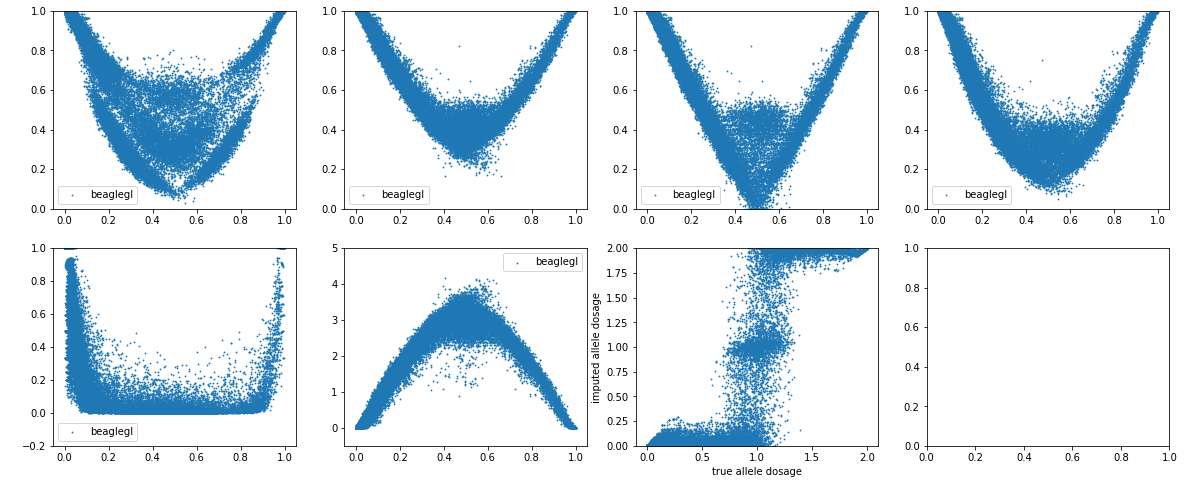

In [9]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [5*4, 4*2]
fig, axes = plt.subplots(2, 4)

tabbeaglegl.plot.scatter('af_info', 'precision_score', ax=axes[0, 0], s=0.7, label='beaglegl')
axes[0, 0].set_ylim(0.0, 1.0)
tabbeaglegl.plot.scatter('af_info', 'accuracy_score', ax=axes[0, 1], s=0.7, label='beaglegl')
axes[0, 1].set_ylim(0.0, 1.0)
tabbeaglegl.plot.scatter('af_info', 'concordance', ax=axes[0, 2], s=0.7, label='beaglegl')
axes[0, 2].set_ylim(0.0, 1.0)
tabbeaglegl.plot.scatter('af_info', 'f1_score', ax=axes[0, 3], s=0.7, label='beaglegl')
axes[0, 3].set_ylim(0.0, 1.0)
tabbeaglegl.plot.scatter('af_info', 'r_squared', ax=axes[1, 0], s=0.7, label='beaglegl')
axes[1, 0].set_ylim(-0.2, 1.0)
tabbeaglegl.plot.scatter('af_info', 'cross_entropy', ax=axes[1, 1], s=0.7, label='beaglegl')
axes[1, 1].set_ylim(-0.5, 5.0)
axes[1, 2].scatter(dosbeaglegl[0], dosbeaglegl[1], s=0.7, label='beaglegl')
axes[1, 2].set_xlabel('true allele dosage')
axes[1, 2].set_ylabel('imputed allele dosage')
axes[1, 2].set_ylim(0.0, 2.0)

for ax in axes.flatten()[:-2]:
    # cast color to white 'w' if dark background
    ax.set_xlabel('true alternate allele frequency', color='w')
    ax.set_ylabel(ax.get_ylabel(), color='w')
plt.savefig(os.path.join(os.path.dirname(paths['beaglegt']['imputed']), 'imputation_quality_gtgl.png'))
plt.show()